In [1]:
import os
import pandas as pd
import re
from pandas import *
from sklearn.model_selection import train_test_split

path='/content/drive/MyDrive/Hepth Deep Text/'
paths = []
paths.append(path+'1991hepthdeeptexts')
for i in range(1992,2004):
    paths.append(path+str(i)+' hepth deep texts')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
'''
infpapertag -
0 - papernumber
1 - number of sitations in the paper
2 - classification
'''
#papers are classified influential and non influential based on the number of citations. The paper is influential if it has at least 50 citations
file=pd.read_csv('/content/drive/MyDrive/infPaperTag.csv')
terms=file['0'].values.tolist()
actual=file['2'].values.tolist()
print(paths)
print(file.head())

['/content/drive/MyDrive/Hepth Deep Text/1991hepthdeeptexts', '/content/drive/MyDrive/Hepth Deep Text/1992 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1993 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1994 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1995 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1996 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1997 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1998 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1999 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/2000 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/2001 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/2002 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/2003 hepth deep texts']
         0    1  2
0  9108001  252  1
1  9108002    8  0
2  9108003   28  0
3  9108004  434  1
4  9108005  117  1


In [4]:
len(paths)

13

In [5]:
# Specify the folder path
folder_path = paths[0]

# Count the number of files in the folder
number_of_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {number_of_files}")

Number of files in the folder: 294


In [6]:
# Specify the folder path
def filecountinfolder(folder_path):
  # Count the number of files in the folder
  number_of_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
  print(f"Number of files in the {folder_path} : {number_of_files}")
for i in range(len(paths)):
  filecountinfolder(paths[i])

Number of files in the /content/drive/MyDrive/Hepth Deep Text/1991hepthdeeptexts : 294
Number of files in the /content/drive/MyDrive/Hepth Deep Text/1992 hepth deep texts : 1307
Number of files in the /content/drive/MyDrive/Hepth Deep Text/1993 hepth deep texts : 1944
Number of files in the /content/drive/MyDrive/Hepth Deep Text/1994 hepth deep texts : 2314
Number of files in the /content/drive/MyDrive/Hepth Deep Text/1995 hepth deep texts : 2263
Number of files in the /content/drive/MyDrive/Hepth Deep Text/1996 hepth deep texts : 2616
Number of files in the /content/drive/MyDrive/Hepth Deep Text/1997 hepth deep texts : 2686
Number of files in the /content/drive/MyDrive/Hepth Deep Text/1998 hepth deep texts : 2772
Number of files in the /content/drive/MyDrive/Hepth Deep Text/1999 hepth deep texts : 2824
Number of files in the /content/drive/MyDrive/Hepth Deep Text/2000 hepth deep texts : 3144
Number of files in the /content/drive/MyDrive/Hepth Deep Text/2001 hepth deep texts : 1417
Num

In [7]:
with open(path + '1991hepthdeeptexts/9108001.txt','r') as f:
  print(f.read())

--------------------------------
E:/BigData/Project/Run/Files_Keywords/TextFiles\9108001.txt
--------------------------------
Thus the solution represents a straight, static, black string.Observers in this spacetime who cross the event horizon are not able
to return, but (fortunately for them) find themselves in another asymptotically flat region
of spacetime which is identical to the one they started in.2
Although the three dimensional black strings are most naturally described in terms of
the string metric (the metric appearing in the sigma model), it is also of interest to consider
the rescaled Einstein metric (with the standard Einstein-Hilbert action)*.Although this is sufficient
to establish the existence of exact solutions with these qualitative features, it was not clear
how to construct directly the conformal field theory with these properties.We now consider geodesics in the black string solutions.Figure 2: The global structure for the extreme Reissner–Nordstro¨m solution, |Q

In [8]:
with open(path + '1992 hepth deep texts/9203007.csv','r') as f:
  print(f.read())

--------------------------------
E:/BigData/Project/Run/Files_Keywords/TextFiles\9203007v1.txt
--------------------------------
hence there exists the possibility of no-boundary theta-states.the feature that excludes all ve non-trivial representations of psl(2, z) is the non-

freeness of its action on the set {(m, n)}, whose members indexed the classical actions.the classical (euclidean) solutions with the no-boundary

boundary data in these models were found in ref.2
9
9
1

 
r
a

m
3

 

 
 

1
v
7
0
0
3
0
2
9
/
h
t
-
p
e
h
:
v
i
x
r
a

freiburg thep-92/7

syracuse su-gp-92/2-3

typeset using revtex

1

i. introduction

it is well known that the quantization of classical theories with topologically nontrivial

conguration spaces may display more variety than what is present in theories built from

topologically trivial conguration spaces [1,2,3,4].but, as already emphasized, it is still useful to talk of theta sectors associated

to one-dimensional, irreducible representations of a

In [9]:
texts = []
files=[]
labels_to_category = []
#training files in 1991 to 1999
for i in range(len(paths)):
    if i==9:
      break
    print(i)
    for j in os.listdir(paths[i]):
      x=int(re.findall(r'\d+',j)[0])
      #print(f'\t {x}')
      if x in terms:
          if x not in files:
            files.append(x)
            #print(paths[i],j)
            #print(files)
            with open(paths[i]+"/"+j,encoding="utf8", errors='ignore') as f:
              #print(f'\t\t {f}')
              #break
              if j != x:
                temp = f.read()
                temp = temp.replace("\n"," ").replace('\r','')
                #print(temp)
                texts.append(temp)
                f.close()

data = read_csv('/content/drive/MyDrive/infPaperTag.csv')

0
1
2
3
4
5
6
7
8


In [10]:
#Number of papers in the train set
print(len(files))
print(len(texts))

18895
18895


In [11]:
texts=texts[:len(files)+2]
labels_to_category= data['2'].tolist()[:len(files)]
print(len(texts),len(labels_to_category))
data_frame = pd.DataFrame({'texts':texts,'CAT':labels_to_category})

18895 18895


In [12]:
!apt install keras.layers.convolutional


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package keras.layers.convolutional
E: Couldn't find any package by glob 'keras.layers.convolutional'


In [13]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from numpy import array
import keras
#from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical


In [14]:
!pip install transformers

In [15]:
'''
remove punctuations
include alphabets only
remove stopwords
remove word if its len is more than 2
'''
def clean_and_get_tokens(doc):
    tokens = doc.split()
    table = str.maketrans('','',punctuation)  #removes punctuations using
    tokens = [w.translate(table) for w in tokens] #dictionary of punctuations
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word)>2]
    return tokens

In [16]:
words = set()
vocab = {}
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
token = data_frame['texts'][0].split()
print(data_frame['texts'][0])
table = str.maketrans('','',punctuation)
tokens = [w.translate(table) for w in token]
print(tokens)
tokens = [word for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
tokens = [word for word in tokens if len(word)>2]
print(tokens)

-------------------------------- E:/BigData/Project/Run/Files_Keywords/TextFiles\9108001.txt -------------------------------- Thus the solution represents a straight, static, black string.Observers in this spacetime who cross the event horizon are not able to return, but (fortunately for them) find themselves in another asymptotically flat region of spacetime which is identical to the one they started in.2 Although the three dimensional black strings are most naturally described in terms of the string metric (the metric appearing in the sigma model), it is also of interest to consider the rescaled Einstein metric (with the standard Einstein-Hilbert action)*.Although this is sufficient to establish the existence of exact solutions with these qualitative features, it was not clear how to construct directly the conformal field theory with these properties.We now consider geodesics in the black string solutions.Figure 2: The global structure for the extreme Reissner–Nordstro¨m solution, |Q

In [18]:
documents = data_frame['texts']
for doc in documents:
    tokens = clean_and_get_tokens(doc)
    for token in tokens:
        if token in vocab:
            vocab[token] += 1
        else:
            vocab[token] = 1

for word in vocab:
    if vocab[word] > 5:
        words.add(word)

In [19]:
print(len(vocab))
print(len(words))

194816
24234


In [20]:
train_data, test_data = train_test_split(data_frame, test_size=0.05)

In [21]:
train_documents = []
#for all docs in train_documents[]
for doc in train_data['texts']:
    tokens = doc.split()
    #string to list
    final_tokens = []
    #list of words(tokens)

    for token in tokens:
        if token in words:
        #append only if token is present in words[]
            final_tokens.append(token)

    final_string = ' '.join(final_tokens)
    #list to string
    train_documents.append(final_string)
    #list of preprocessed docs
print(train_documents[0])

test_documents = []
for doc in test_data['texts']:
    tokens = doc.split()
    final_tokens = []
    #final_string = ''
    for token in tokens:
        if token in words:
            final_tokens.append(token)
    final_string = ' '.join(final_tokens)
    test_documents.append(final_string)
print(test_documents[0])

want show classical integrals motion classical toda eld associated simple lie algebra dene space local integrals motion toda equation kernel operator intersection kernels operators dots represent basis vectors necessarily kernel dierential case liouville simplest toda eld able explicit formulas local integrals motion identify poisson algebra classical virasoro vector corresponding element weyl weight positive roots let vectors classical toda field theories associated simple case classical liouville nilpotency ensured commutativity corresponding squares weyl group special sign analogous one lemma integrals motion quantum groups complex similar one introduced put deg element dual space cartan subalgebra case classical explained complex appears rst term spectral associated brst complex subalgebra isomorphic classical virasoro corollary total dierential complex realization central extension loop algebra nilpotent subalgebra identied element operator coincides operator dened therefore poiss

In [22]:
print(len(train_documents))

17950


In [26]:
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(train_documents)
#encoded_docs = tokenizer.texts_to_sequences(train_documents)
from transformers import AutoTokenizer

tz = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
#SCIBERT WORD EMBEDDING

for i in range (0,len(train_documents)):
  tz.tokenize(train_documents[i])
encoded_docs = []
for i in range(0,len(train_documents)):
  encoded_docs.append(tz.convert_tokens_to_ids(tz.tokenize(train_documents[i])))
#Converts a token string (or a sequence of tokens) in a single integer id (or a sequence of ids), using the vocabulary.
max_length = max(([len(s.split()) for s in train_documents]))
labels = train_data['CAT']
train_labels = labels
print('Max Length',max_length)


Max Length 745


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytrain = to_categorical(labels,num_classes=2)
print(Xtrain)
print(ytrain)

[[ 6181   405  5109 ...     0     0     0]
 [ 1425  1157 21369 ...     0     0     0]
 [  817  1188  3253 ...     0     0     0]
 ...
 [  922 10737  5167 ...     0     0     0]
 [10412 28471 18435 ...     0     0     0]
 [ 1053  2994 30135 ...     0     0     0]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [28]:
for i in range (0,len(test_documents)):
  tz.tokenize(test_documents[i])
encoded_docs = []
for i in range(0,len(test_documents)):
  encoded_docs.append(tz.convert_tokens_to_ids(tz.tokenize(test_documents[i])))
labels = test_data['CAT']
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytest = to_categorical(labels,num_classes=2)
print(Xtest)
print(ytest)

[[  437  1745  2095 ...     0     0     0]
 [ 2389  7220   176 ...     0     0     0]
 [ 3647  2806  2704 ...     0     0     0]
 ...
 [  469   797  9449 ...     0     0     0]
 [ 1991  1098  7207 ...     0     0     0]
 [ 4851  2080 10895 ...     0     0     0]]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [29]:
print(type(Xtest))
print((Xtrain).size)

<class 'numpy.ndarray'>
13372750


In [30]:
model = Sequential()
model.add(Embedding(60000, 100, input_length = max_length))
model.add(Conv1D(filters=16, kernel_size=16, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
loss_batch = []
accuracy_batch = []

In [32]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
  def on_test_batch_end(self, batch, logs=None):
    loss_batch.append(logs["loss"])
    accuracy_batch.append(logs["accuracy"])

In [33]:
my_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy',
    patience=30,
    min_delta=0.001,
    mode='max'),
    LossAndErrorPrintingCallback()
]

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
#out_batch = NBatchLogger(display=1000)
out_batch1 =LossAndErrorPrintingCallback()
history=model.fit(Xtrain, ytrain, verbose=2,epochs = 100, validation_data = (Xtest,ytest),callbacks = my_callbacks)

Epoch 1/100
561/561 - 13s - 23ms/step - accuracy: 0.7557 - loss: 0.5639 - val_accuracy: 0.7757 - val_loss: 0.5363
Epoch 2/100
561/561 - 14s - 25ms/step - accuracy: 0.8072 - loss: 0.4122 - val_accuracy: 0.7640 - val_loss: 0.6084
Epoch 3/100
561/561 - 4s - 7ms/step - accuracy: 0.9848 - loss: 0.0717 - val_accuracy: 0.7524 - val_loss: 0.8128
Epoch 4/100
561/561 - 5s - 9ms/step - accuracy: 0.9982 - loss: 0.0168 - val_accuracy: 0.7566 - val_loss: 0.9381
Epoch 5/100
561/561 - 5s - 9ms/step - accuracy: 0.9989 - loss: 0.0096 - val_accuracy: 0.7608 - val_loss: 1.0635
Epoch 6/100
561/561 - 4s - 7ms/step - accuracy: 0.9991 - loss: 0.0073 - val_accuracy: 0.7418 - val_loss: 1.0699
Epoch 7/100
561/561 - 5s - 9ms/step - accuracy: 0.9992 - loss: 0.0050 - val_accuracy: 0.7534 - val_loss: 1.1819
Epoch 8/100
561/561 - 4s - 7ms/step - accuracy: 0.9991 - loss: 0.0058 - val_accuracy: 0.7608 - val_loss: 1.3197
Epoch 9/100
561/561 - 4s - 7ms/step - accuracy: 0.9991 - loss: 0.0052 - val_accuracy: 0.7545 - val_l

In [35]:
loss_batch0,loss_batch1,loss_batch2,loss_batch3,loss_batch4,loss_batch5,loss_batch6,loss_batch7,loss_batch8,loss_batch9,loss_batch10,loss_batch11,loss_batch12,loss_batch13,loss_batch14,loss_batch15,loss_batch16,loss_batch17,loss_batch18,loss_batch19,loss_batch20,loss_batch21,loss_batch22,loss_batch23,loss_batch24,loss_batch25,loss_batch26,loss_batch27,loss_batch28,loss_batch29,loss_batch30 = (list(np.array_split(loss_batch, 31)[i]) for i in range(31))

In [36]:
list_loss_batch = []
list_loss_batch = [loss_batch0,loss_batch1,loss_batch2,loss_batch3,loss_batch4,loss_batch5,loss_batch6,loss_batch7,loss_batch8,loss_batch9,loss_batch10,loss_batch11,loss_batch12,loss_batch13,loss_batch14,loss_batch15,loss_batch16,loss_batch17,loss_batch18,loss_batch19,loss_batch20,loss_batch21,loss_batch22,loss_batch23,loss_batch24,loss_batch25,loss_batch26,loss_batch27,loss_batch28,loss_batch29,loss_batch30]

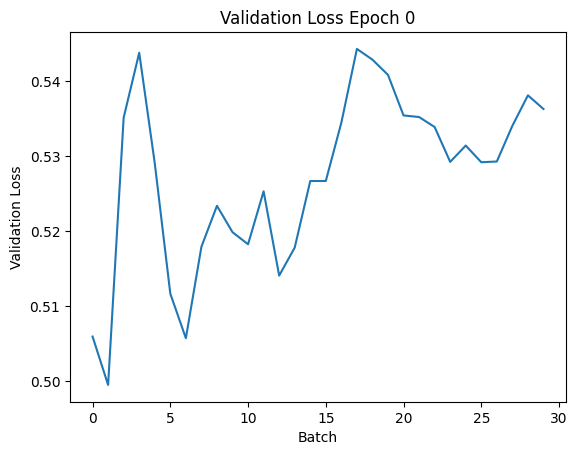

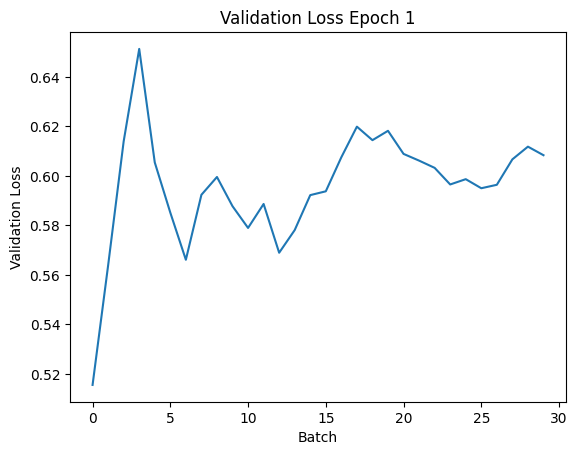

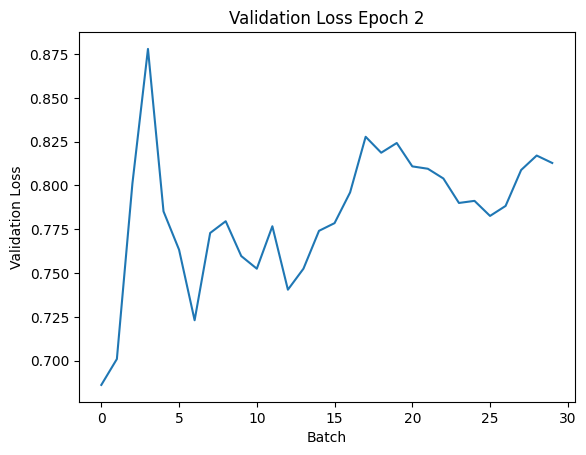

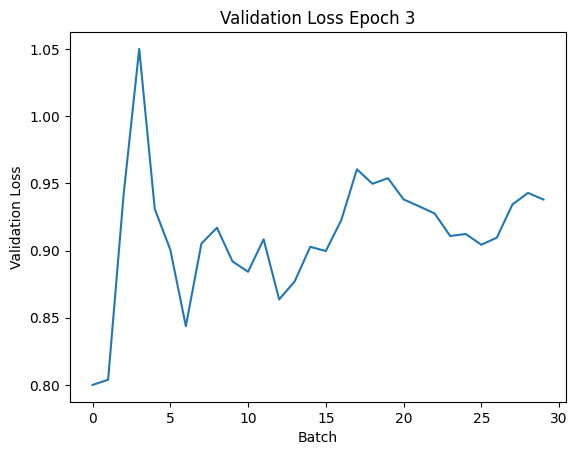

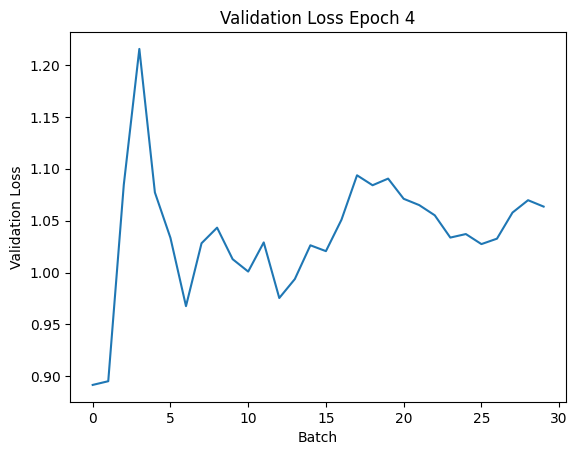

In [ ]:
import matplotlib.pyplot as plt
num=[]
for i in range(30):
  num.append(i)
for i in range(len(history.history['loss'])):
  plt.plot(num,list_loss_batch[i])
  plt.xlabel('Batch')
  plt.ylabel('Validation Loss')
  plt.title('Validation Loss Epoch '+str(i))
  plt.show()


In [44]:
accuracy_batch0,accuracy_batch1,accuracy_batch2,accuracy_batch3,accuracy_batch4,accuracy_batch5,accuracy_batch6,accuracy_batch7,accuracy_batch8,accuracy_batch9,accuracy_batch10,accuracy_batch11,accuracy_batch12,accuracy_batch13,accuracy_batch14,accuracy_batch15,accuracy_batch16,accuracy_batch17,accuracy_batch18,accuracy_batch19,accuracy_batch20,accuracy_batch21,accuracy_batch22,accuracy_batch23,accuracy_batch24,accuracy_batch25,accuracy_batch26,accuracy_batch27,accuracy_batch28,accuracy_batch29,accuracy_batch30 = (list(np.array_split(accuracy_batch, 31)[i]) for i in range(31))

In [ ]:
list_accuracy_batch = []
list_accuracy_batch = [accuracy_batch0,accuracy_batch1,accuracy_batch2,accuracy_batch3,accuracy_batch4,accuracy_batch5,accuracy_batch6,accuracy_batch7,accuracy_batch8,accuracy_batch9,accuracy_batch10,accuracy_batch11,accuracy_batch12,accuracy_batch13,accuracy_batch14,accuracy_batch15,accuracy_batch16,accuracy_batch17,accuracy_batch18,accuracy_batch19,accuracy_batch20,accuracy_batch21,accuracy_batch22,accuracy_batch23,accuracy_batch24,accuracy_batch25,accuracy_batch26,accuracy_batch27,accuracy_batch28,accuracy_batch29,accuracy_batch30]

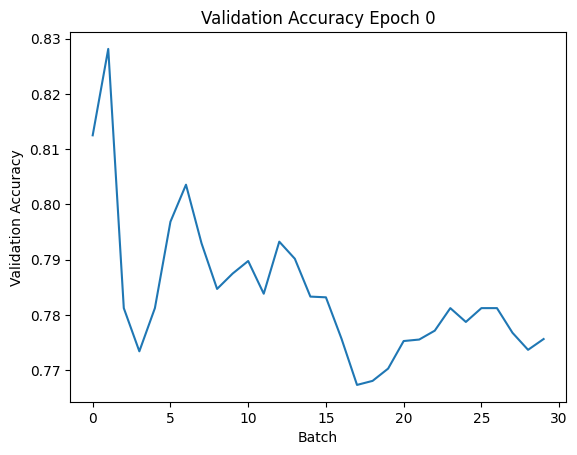

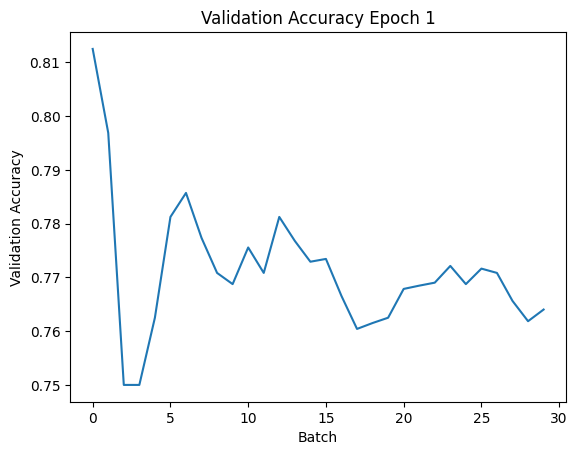

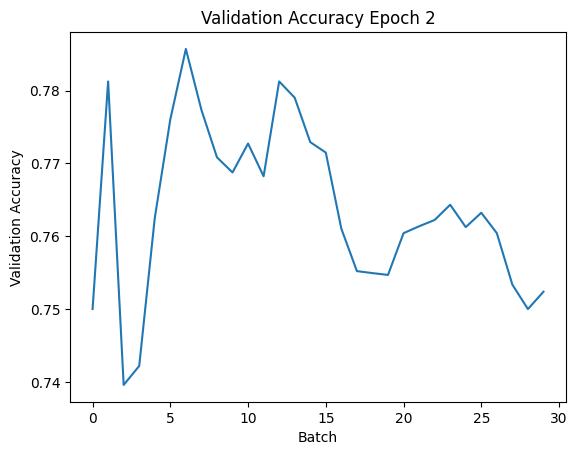

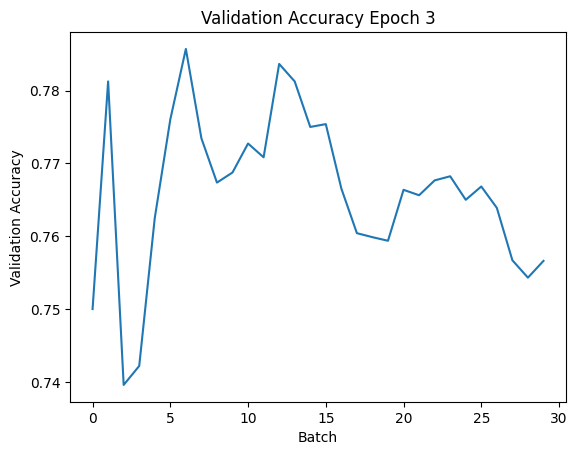

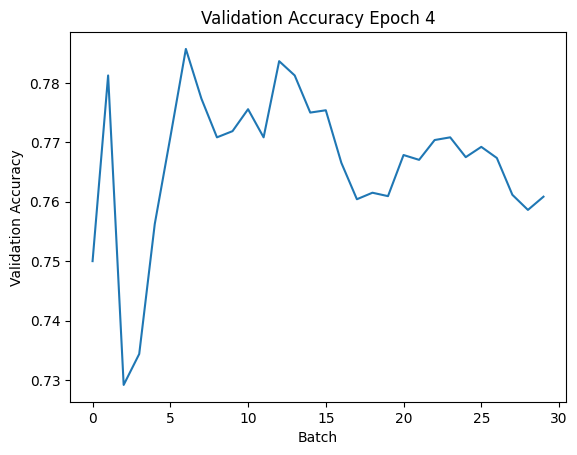

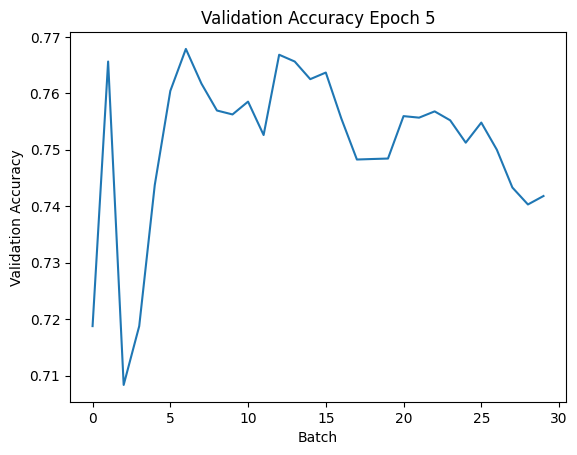

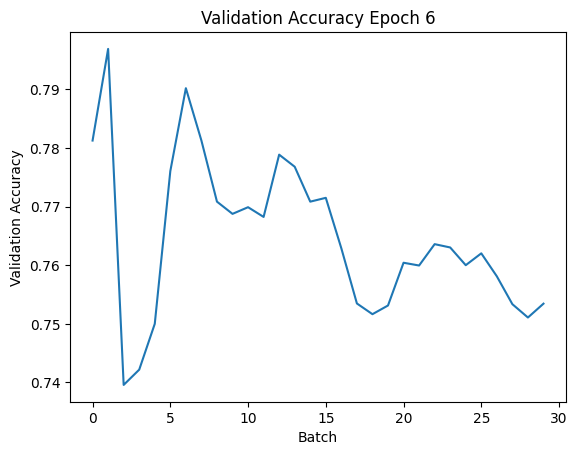

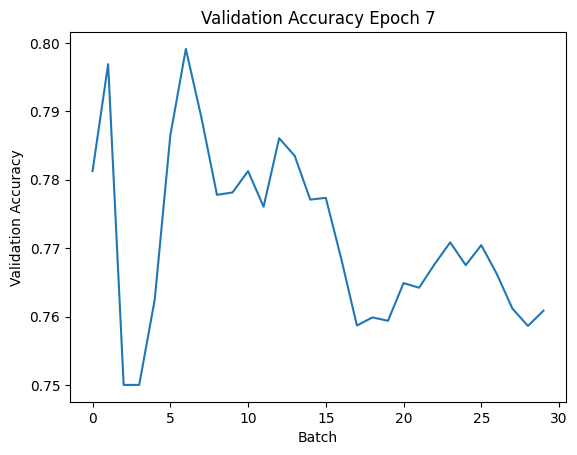

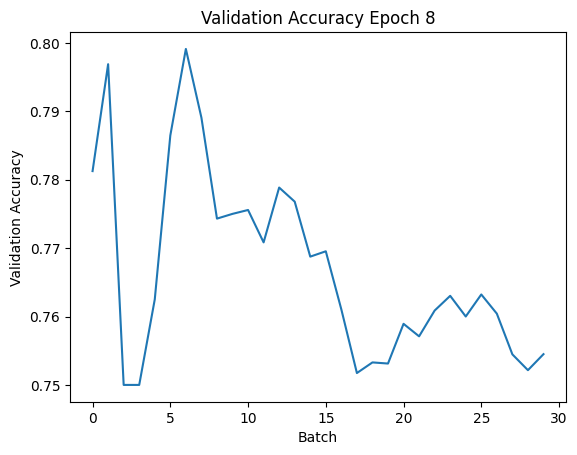

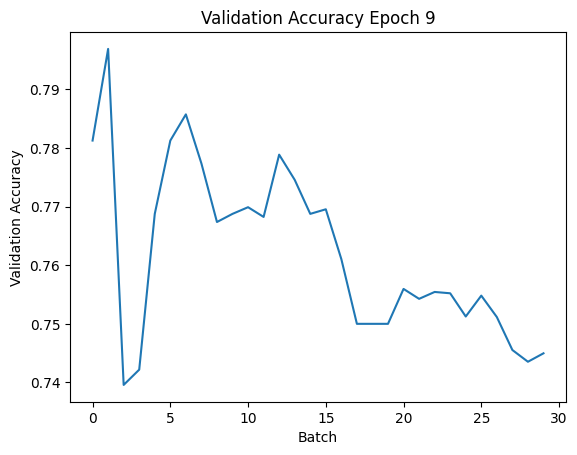

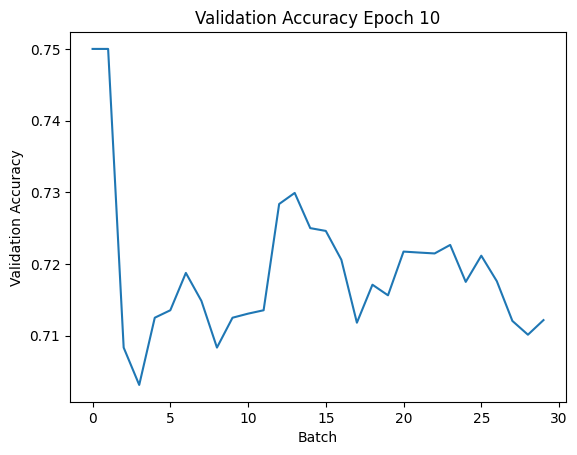

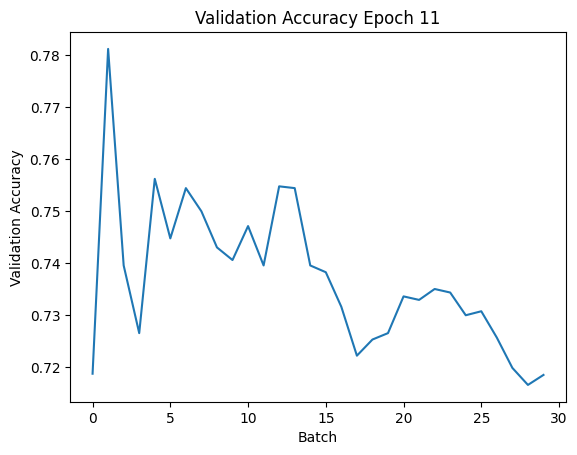

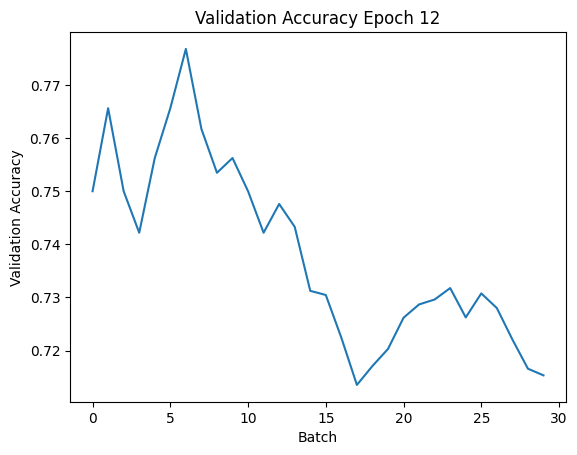

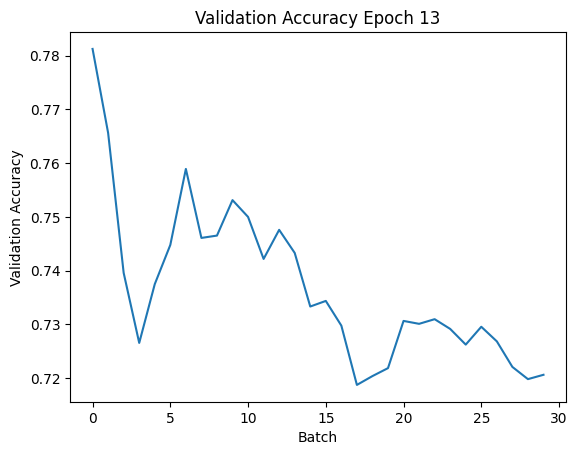

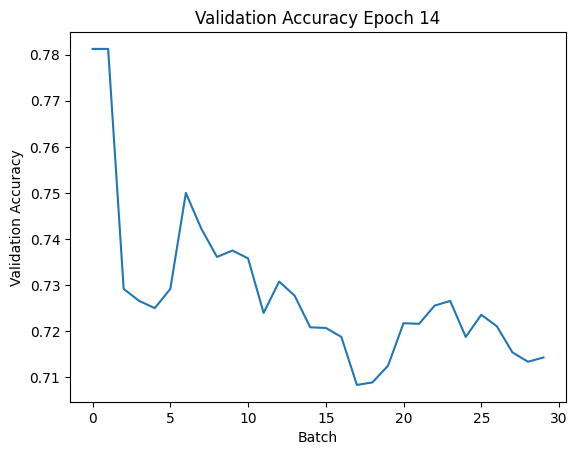

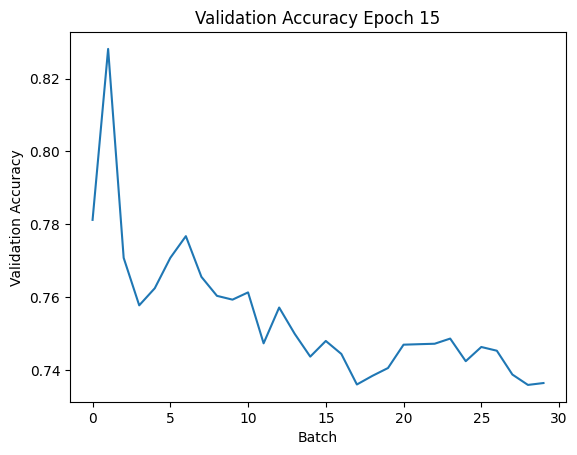

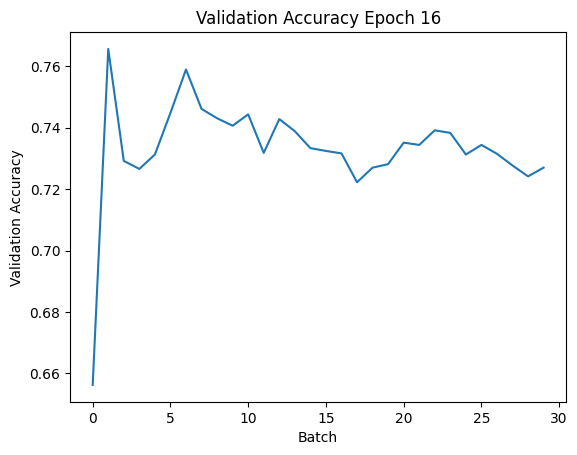

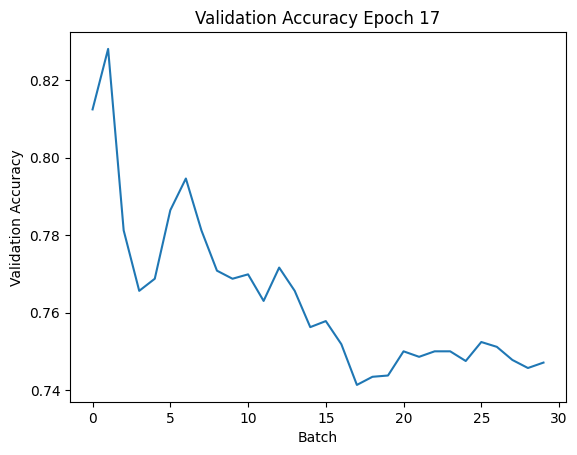

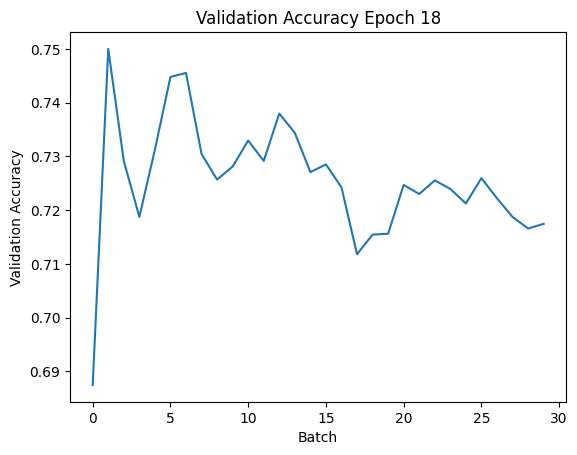

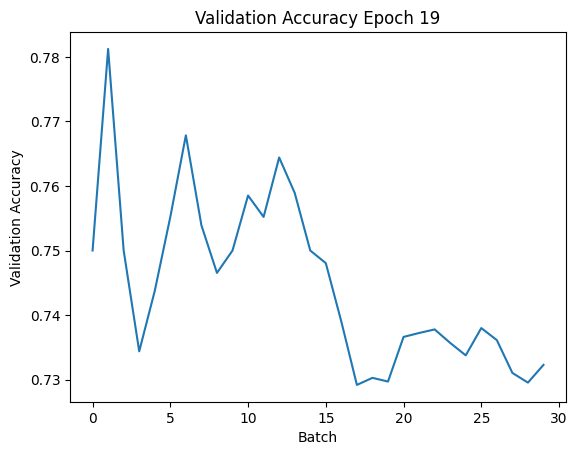

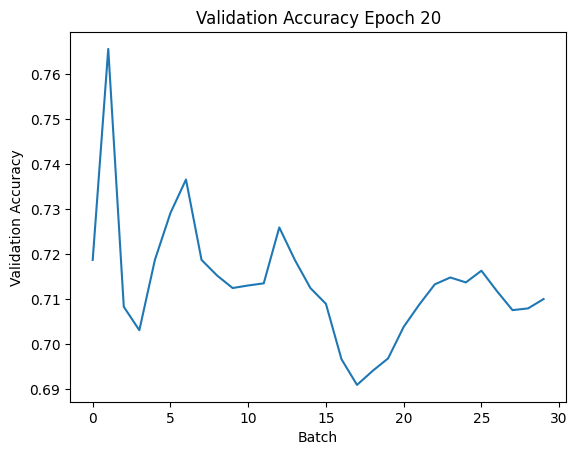

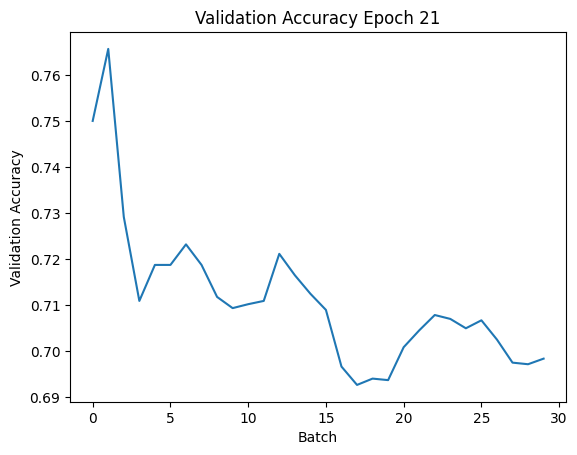

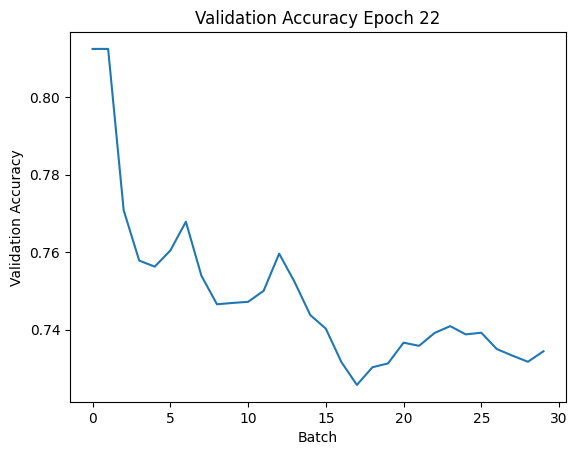

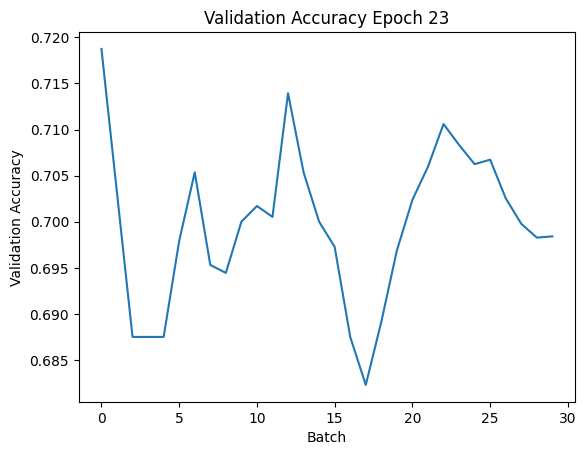

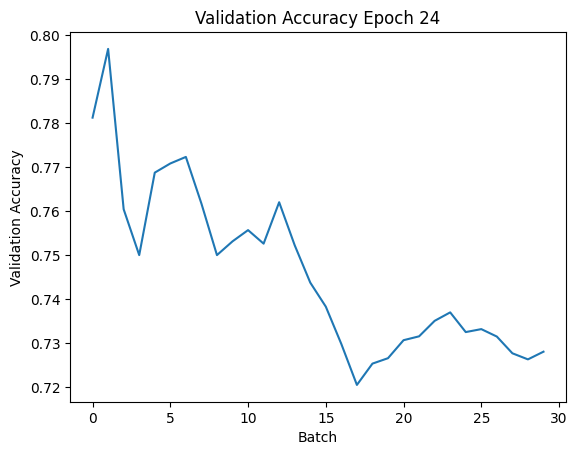

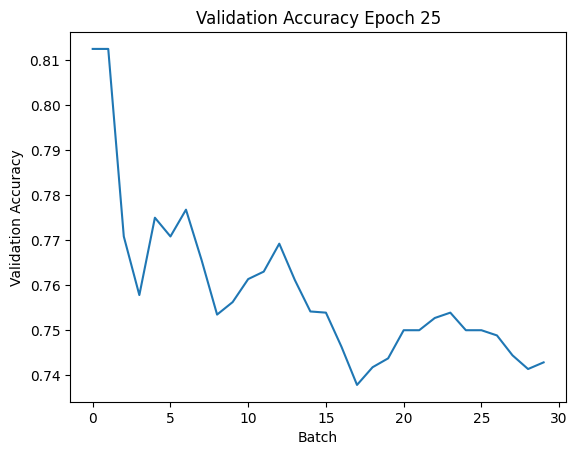

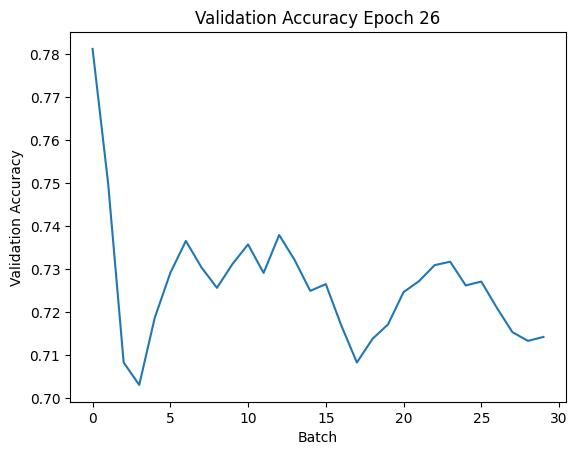

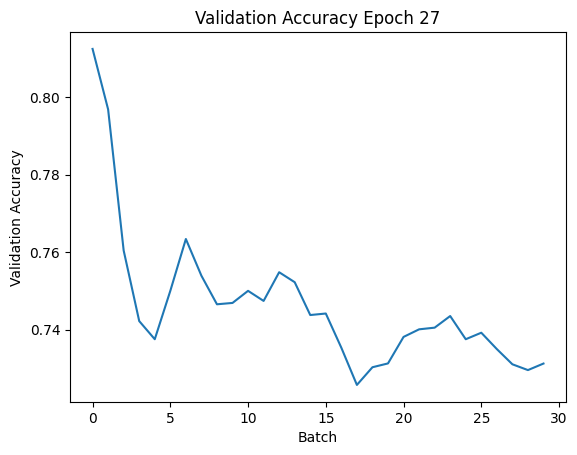

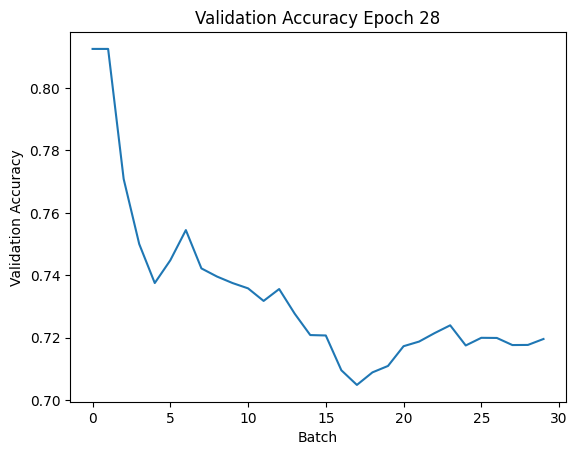

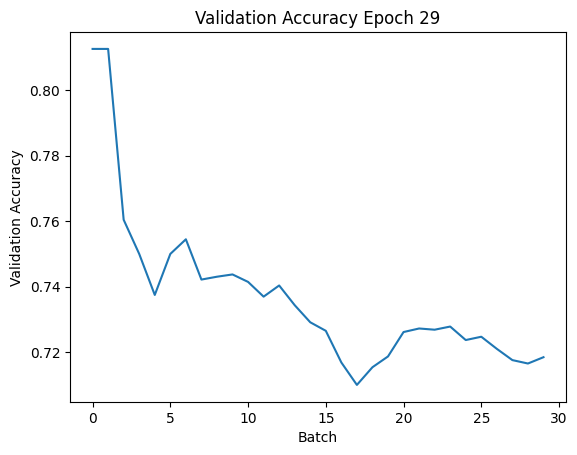

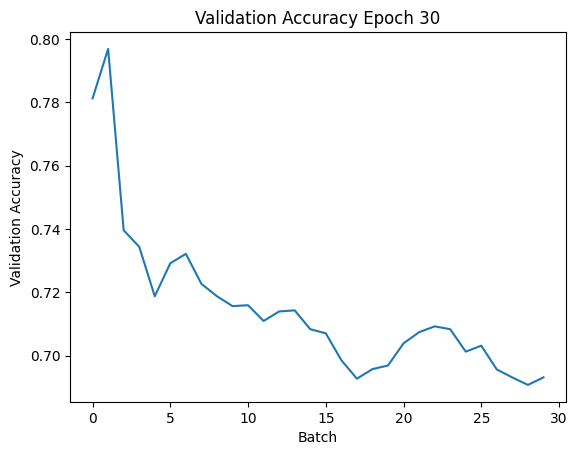

In [40]:
for i in range(len(history.history['loss'])):
  plt.plot(num,list_accuracy_batch[i])
  plt.xlabel('Batch')
  plt.ylabel('Validation Accuracy')
  plt.title('Validation Accuracy Epoch '+str(i))
  plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
    accuracy      loss  val_accuracy  val_loss  epoch
26  0.996323  0.010674      0.714286  2.861424     26
27  0.996323  0.010077      0.731217  3.255965     27
28  0.995822  0.012153      0.719577  3.097761     28
29  0.996045  0.011603      0.718518  3.199432     29
30  0.996323  0.010093      0.693122  2.884099     30


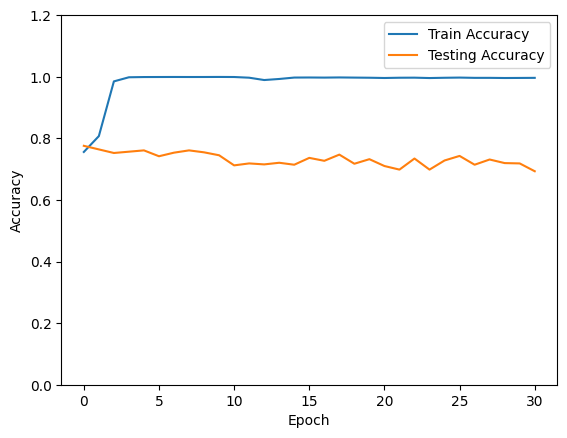

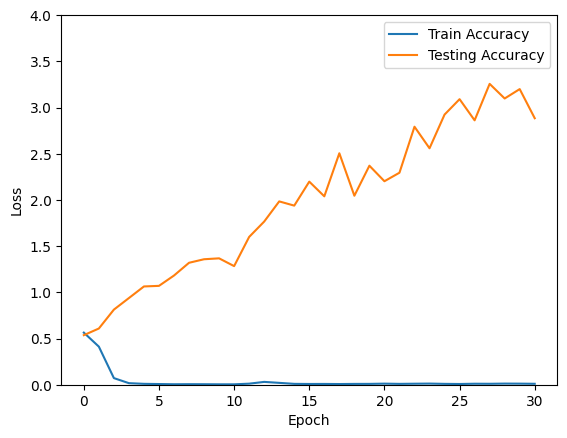

In [41]:
_, accuracySingleLayer = model.evaluate(Xtrain, ytrain, verbose=0)
import matplotlib.pyplot as plt
print(history.history.keys())
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Testing Accuracy')
  plt.ylim([0,1.2])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_loss'],label = 'Testing Accuracy')
  plt.ylim([0,4])
  plt.legend()


plot_history(history)

In [42]:
from tensorflow.keras.models import save_model, load_model
model.save('/content/drive/MyDrive/trained models/Train.h5')

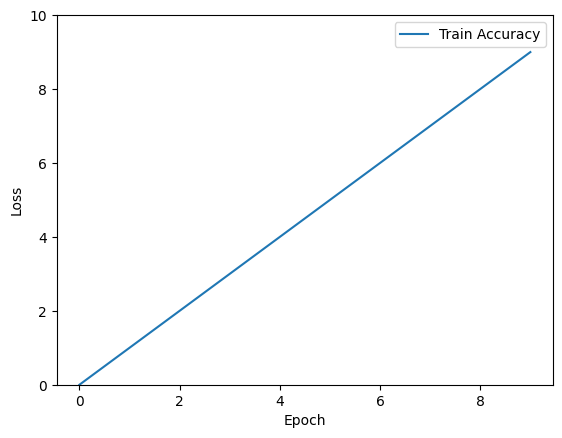

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
hist=[]
for i in range(10):
  hist.append([i,i])
hist=pd.DataFrame(hist)
hist.columns=['Epoch','Loss']
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist['Epoch'], hist['Loss'],label='Train Accuracy')
#plt.plot(hist['epoch'], hist['val_loss'],label = 'Testing Accuracy')
plt.ylim([0,10])
plt.legend()